In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

/tmp/ipykernel_629553/1276451955.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("Spotify Million Song Dataset_exported.csv")

In [4]:
df.shape

(57650, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [6]:
df.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


In [7]:
df.nunique()

artist      643
song      44824
link      57650
text      57494
dtype: int64

In [8]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [9]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (57650, 4)

Data Types:
 artist    object
song      object
link      object
text      object
dtype: object

Missing Values:
 artist    0
song      0
link      0
text      0
dtype: int64


In [10]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [11]:
df.tail()

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \nmake yourself at home \ni'm a bit ...


# Data Viz

/tmp/ipykernel_629553/2048123384.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Song Count', y='Artist', data=song_counts, palette='viridis')


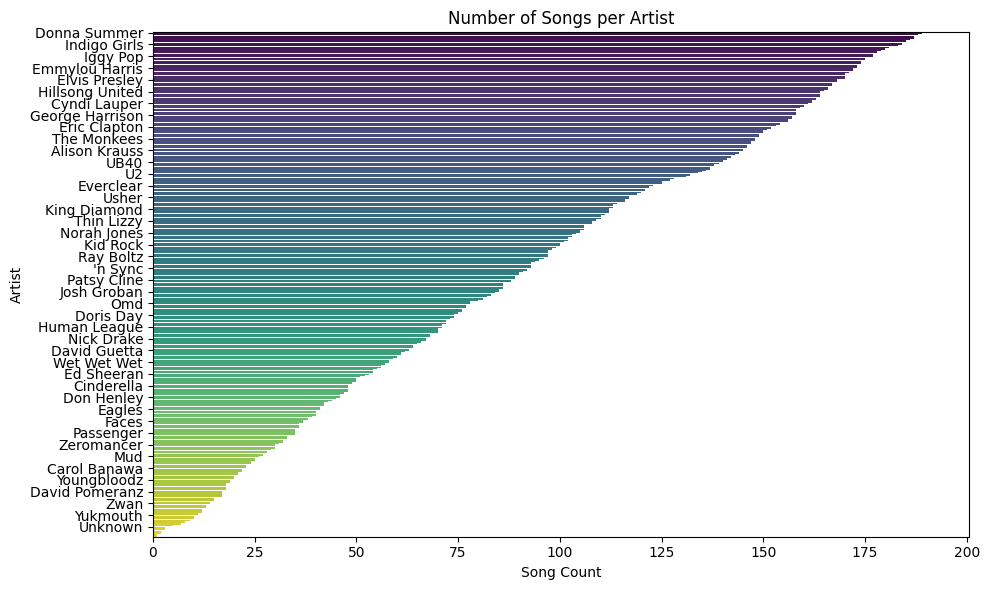

In [12]:
# Count the number of songs per artist
song_counts = df['artist'].value_counts().reset_index()
song_counts.columns = ['Artist', 'Song Count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Song Count', y='Artist', data=song_counts, palette='viridis')
plt.xlabel('Song Count')
plt.ylabel('Artist')
plt.title('Number of Songs per Artist')

# Display only every nth label
n = 15  # Adjust the value of n as needed
plt.yticks(range(0, len(song_counts), n), song_counts['Artist'][::n])

plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

In [13]:
df['text_length'] = df['text'].apply(len)

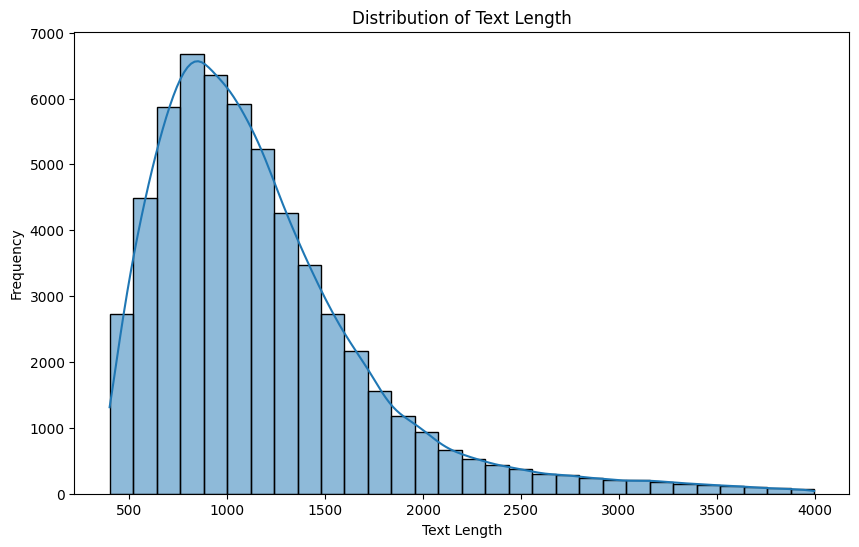

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

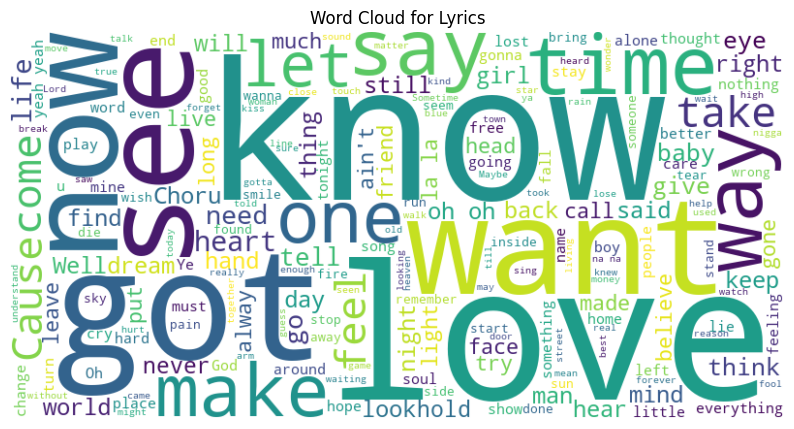

In [15]:
from wordcloud import WordCloud

# Word Cloud for Lyrics
text_data = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lyrics')
plt.show()

/tmp/ipykernel_629553/1309765053.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')


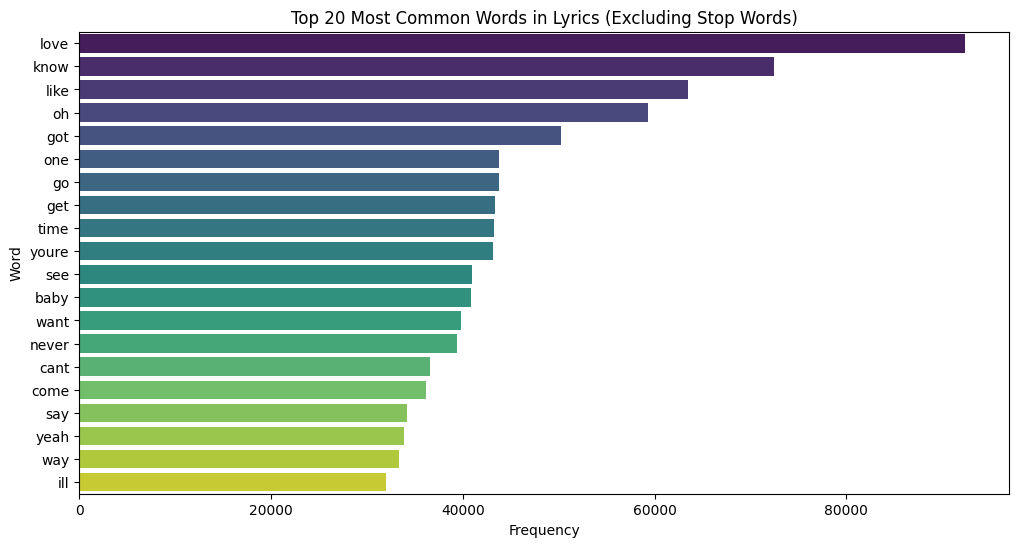

In [18]:
import pandas as pd
import seaborn as sns
from collections import Counter
import string

# Combine all lyrics into a single string
all_lyrics = ' '.join(df['text'])

# Define a list of common English stop words
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
      "yourself", "yourselves", 
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
      "they", "them", "their", 
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
      "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
      "did", "doing", "a", "an", 
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
      "for", "with", "about", 
    "against", "between", "into", "through", "during", "before", "after", "above", "below",
      "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once",
      "here", "there", "when", "where", 
    "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some",
      "such", "no", "nor", "not", 
    "only", "own", "same", "so", "than", "too", "very", "s", "t",
      "can", "will", "just", "don", "should", "now", "im", "dont"
])

# Tokenize the lyrics and remove punctuation
translator = str.maketrans('', '', string.punctuation)
tokens = all_lyrics.lower().translate(translator).split()

# Remove stop words
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count the frequency of each word
word_freq = Counter(filtered_tokens)

# Select the top 20 most common words
top_words = word_freq.most_common(20)

# Convert to DataFrame for plotting
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=top_words_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Common Words in Lyrics (Excluding Stop Words)')
plt.show()
